In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.filters import sobel
from skimage.transform import resize

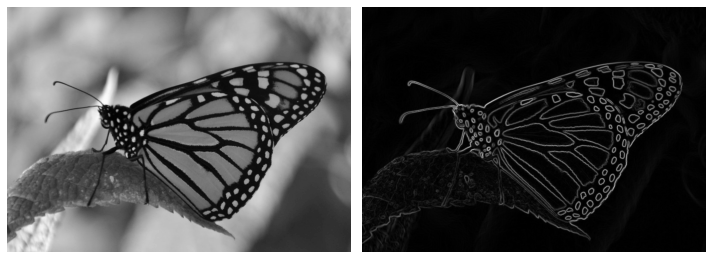

In [2]:

img = imread("Monarch - Ted CC-BY-SA.jpg")
img = img[:,:,0]
img = resize(img, (img.shape[0], img.shape[1]//1.15))

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(img, cmap="gray")
ax[1].imshow(sobel(img), cmap="gray")
for a in ax:
    a.axis("off")
plt.tight_layout()



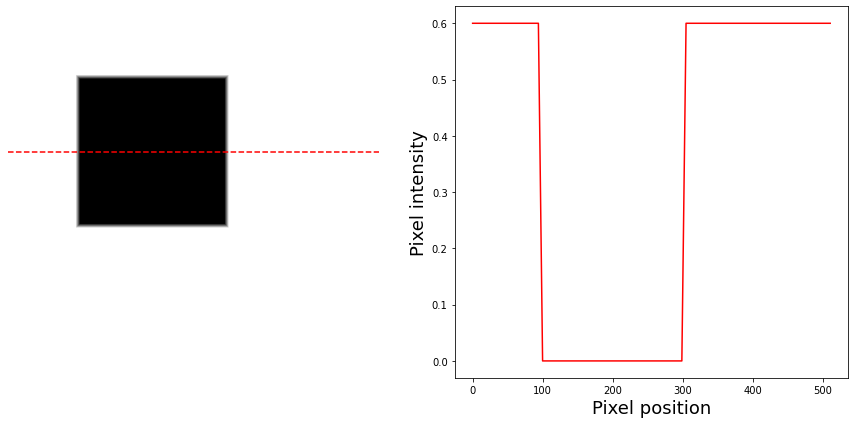

In [3]:
img = np.ones((512, 512), dtype=float) - 0.4

img[95:305, 95:305] = 0.5
img[96:304, 96:304] = 0.4
img[97:303, 97:303] = 0.3
img[98:302, 98:302] = 0.2
img[99:301, 99:301] = 0.1
img[100:300, 100:300]=0

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 6))
ax[0].imshow(img, cmap="gray")
ax[0].hlines(200, 0, img.shape[1], colors="r", linestyles="dashed")
ax[0].axis("off")
ax[1].plot(range(512), img[200], "r-")
ax[1].set_xlabel("Pixel position", fontsize=18)
ax[1].set_ylabel("Pixel intensity", fontsize=18)
plt.tight_layout()

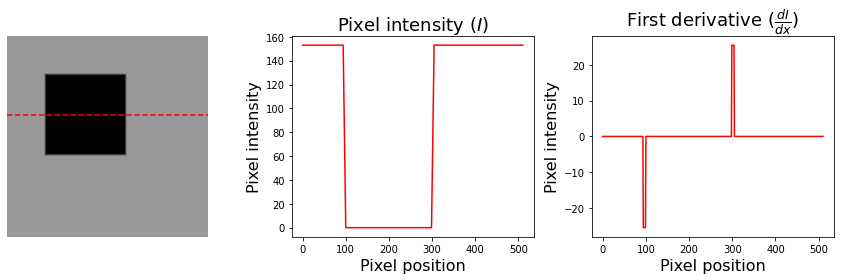

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(img, cmap="gray", vmin=0, vmax=1)
ax[0].hlines(200, 0, img.shape[1], colors="r", linestyles="dashed")
ax[0].axis("off")

ax[1].plot(range(512), img[200]*255, "r-")
ax[1].set_xlabel("Pixel position", fontsize=16)
ax[1].set_ylabel("Pixel intensity", fontsize=16)
ax[1].set_title("Pixel intensity ($I$)", fontsize=18)

ax[2].plot(range(511), np.diff(img[200])*255, "r-")
ax[2].set_xlabel("Pixel position", fontsize=16)
ax[2].set_ylabel("Pixel intensity", fontsize=16)
ax[2].set_title("First derivative ($\\frac{dI}{dx}$)", fontsize=18)
plt.tight_layout()

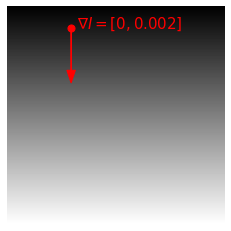

In [5]:
img = np.linspace(0, 1, 512).repeat(512).reshape((512, 512))

plt.imshow(img, cmap="gray")
plt.axis("off")

gx, gy = np.gradient(img)

gx *= 100/np.max(gx)
# gy *= 100/np.max(gy)

plt.arrow(150, 50, gy[150, 50], gx[150, 50], color="r", head_width=20, head_length=30)
plt.scatter(150, 50, s=50, color="r")
plt.text(165, 50, "$\\nabla I = \\left[0, 0.002\\right]$", color="r", fontsize=15)
plt.show()

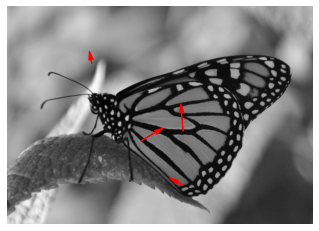

In [6]:

img = imread("Monarch - Ted CC-BY-SA.jpg")
img = img[:,:,0]
img = resize(img, (img.shape[0], img.shape[1]//1.15))

gx, gy = np.gradient(img)

gx *= 300/np.max(gx)
gy *= 300/np.max(gy)

def plot_gradient(pos_x, pos_y, gx, gy):
    plt.arrow(pos_x, pos_y, gx[pos_x, pos_y], gy[pos_x, pos_y], color="r", head_width=10, head_length=20)

plt.imshow(img, cmap="gray")
plot_gradient(192, 130, gx, gy)
plot_gradient(400, 407, gx, gy)
plot_gradient(305, 305, gx, gy)
plot_gradient(400, 284, gx, gy)
plt.axis("off")
plt.show()

In [8]:
t = [10, 16, 22, 36, 40, 11, 17, 23, 37, 41]
res = [t[i+1] - t[i-1] for i in range(1, len(t)-1)]

for r in res:
    print(f"{r} \&")

12 \&
20 \&
18 \&
-25 \&
-23 \&
12 \&
20 \&
18 \&


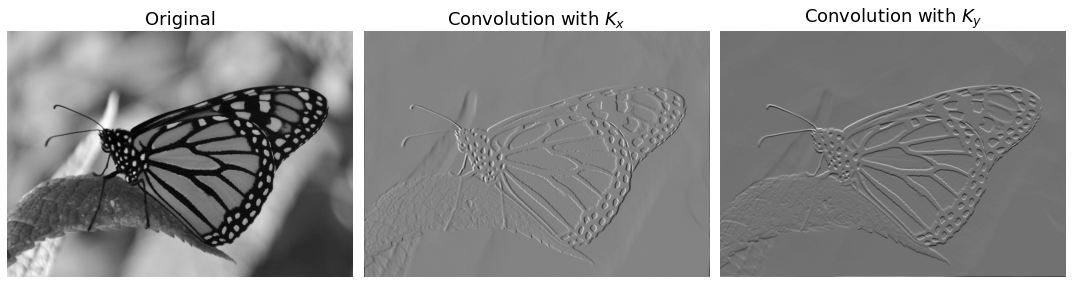

In [9]:
img = imread("Monarch - Ted CC-BY-SA.jpg")
img = img[:,:,0]
img = resize(img, (img.shape[0], img.shape[1]//1.15))

convolved_x = np.convolve(img.ravel(), [-1, 0, 1], "same").reshape(img.shape)
convolved_y = np.convolve(np.transpose(img).ravel(), [-1, 0, 1], "same").reshape((img.shape[1], img.shape[0])).transpose()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap="gray")
ax[1].imshow(convolved_x, cmap="gray")
ax[2].imshow(convolved_y, cmap="gray")

titles = ['Original', 'Convolution with $K_x$', 'Convolution with $K_y$']
for i, a in enumerate(ax):
    a.axis("off")
    a.set_title(titles[i], fontsize=18)

plt.tight_layout()


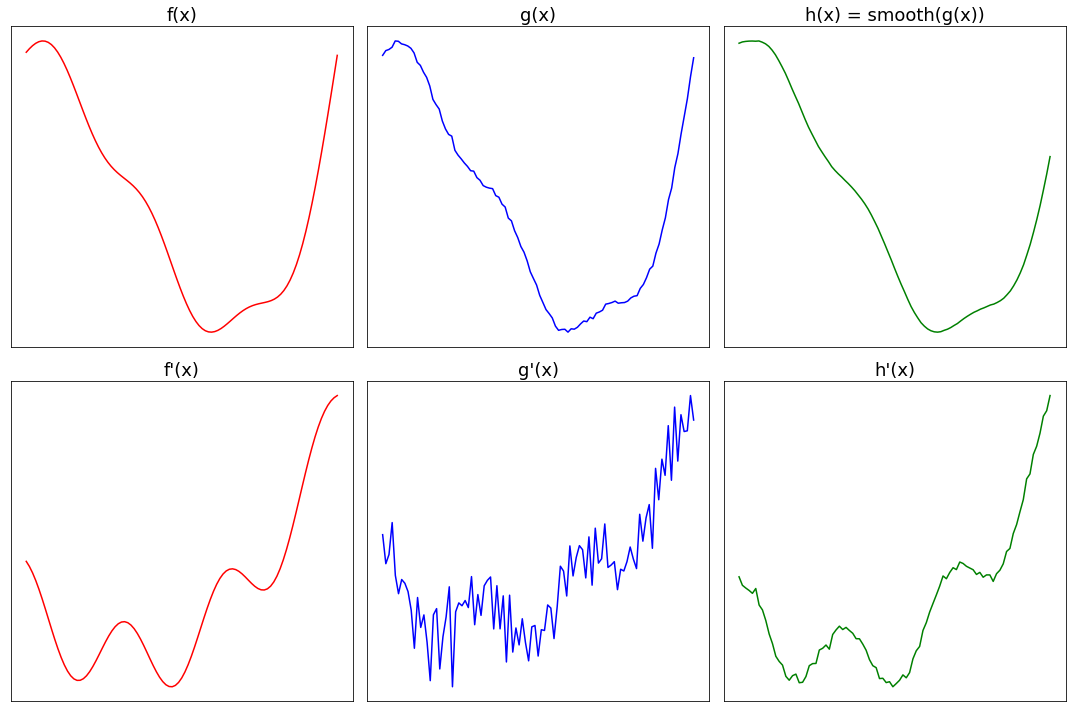

In [10]:
np.random.seed(12345)
x = np.array(range(100))*0.1
y = .1 * x ** 3 - x ** 2 + np.sin(2*x)
y2 = y + np.random.normal(0, .1, len(y))
y2_smooth = np.array([np.mean(y2[max(0, i-5):i+5]) for i in range(len(y2)-5)])

y_der = [y[i]-y[i-1] for i in range(1, len(y))]
y2_der = [y2[i]-y2[i-1] for i in range(1, len(y2))]
y2_smooth_der = [y2_smooth[i]-y2_smooth[i-1] for i in range(1, len(y2_smooth))]

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].plot(x, y, "r-")
ax[0, 1].plot(x, y2, "b-")
ax[0, 2].plot(x[:-5], y2_smooth, "g-")
ax[1, 0].plot(x[:-1], y_der, "r-")
ax[1, 1].plot(x[:-1], y2_der, "b-")
ax[1, 2].plot(x[:-6], y2_smooth_der, "g-")

titles = ["f(x)", "g(x)", "h(x) = smooth(g(x))", "f'(x)", "g'(x)", "h'(x)"]

for i, a in enumerate(ax.ravel()):
    a.set_title(titles[i], fontsize=18)    
    a.xaxis.set_visible(False)
    a.yaxis.set_visible(False)

plt.tight_layout()

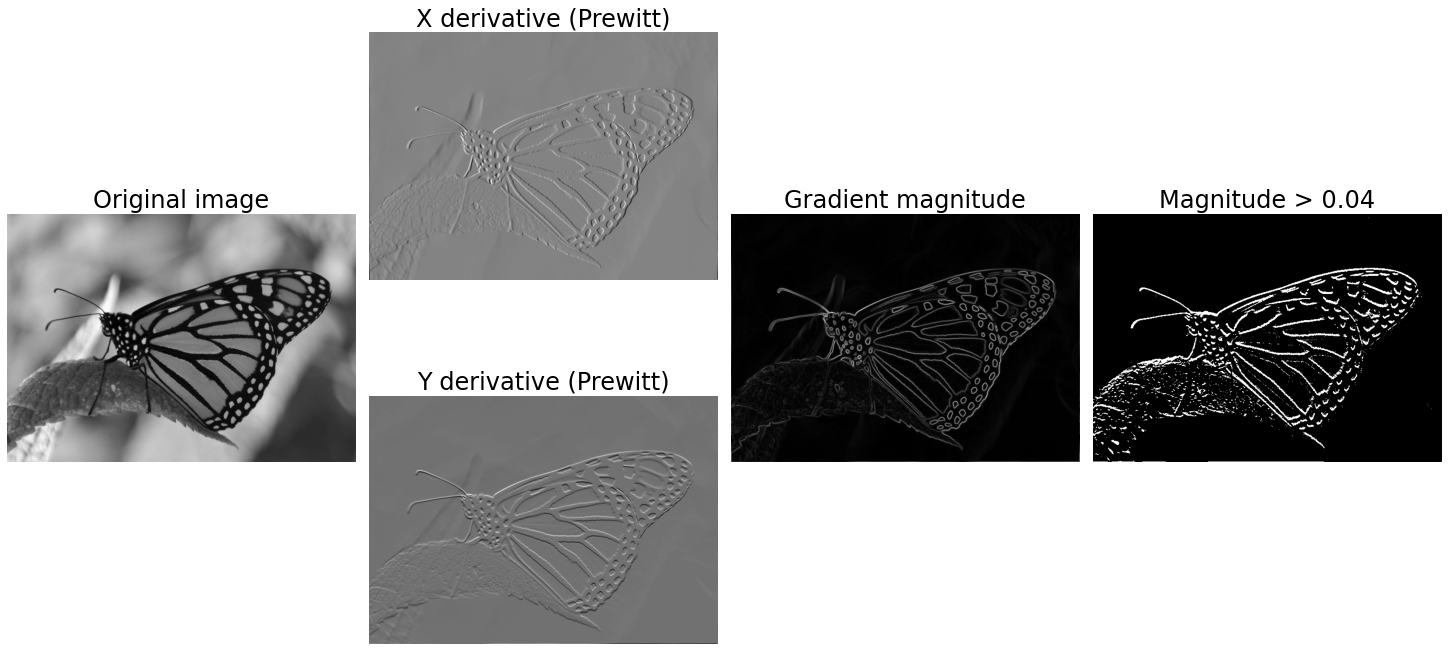

In [11]:
img = imread("Monarch - Ted CC-BY-SA.jpg")
img = img[:, :, 0]
img = resize(img, (img.shape[0], img.shape[1]//1.15))

prewitt_x = np.convolve(img.ravel(), [-1, 0, 1], "same").reshape(img.shape)
prewitt_y = np.convolve(np.transpose(img).ravel(
), [-1, 0, 1], "same").reshape((img.shape[1], img.shape[0])).transpose()

fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(ncols=4, nrows=2)
ax = []
ax.append(fig.add_subplot(gs[:, 0]))
ax.append(fig.add_subplot(gs[0, 1]))
ax.append(fig.add_subplot(gs[1, 1]))
ax.append(fig.add_subplot(gs[:, 2]))
ax.append(fig.add_subplot(gs[:, 3]))

threshold = 0.04

titles = ["Original image", "X derivative (Prewitt)", "Y derivative (Prewitt)",
          "Gradient magnitude", "Magnitude > " + str(threshold)]

ax[0].imshow(img, cmap="gray")
ax[1].imshow(prewitt_x, cmap="gray")
ax[2].imshow(prewitt_y, cmap="gray")
ax[3].imshow(np.sqrt(prewitt_x**2 + prewitt_y**2), cmap="gray")
ax[4].imshow(prewitt_y > threshold, cmap="gray")

for i, a in enumerate(ax):
    ax[i].set_title(titles[i], fontsize=24)
    ax[i].axis("off")

plt.show()


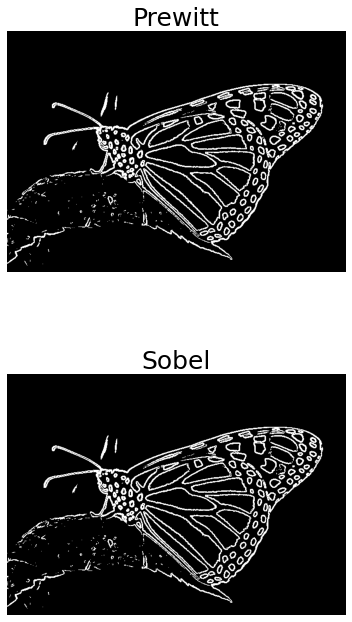

In [12]:
from skimage.filters import prewitt, sobel

im_prewitt = prewitt(img)
im_sobel = sobel(img)

fig, ax = plt.subplots(2, 1, figsize=(5, 10))
ax[0].imshow(im_prewitt > 0.08, cmap="gray")
ax[0].set_title("Prewitt", fontsize=25)
ax[1].imshow(im_sobel > 0.08, cmap="gray")
ax[1].set_title("Sobel", fontsize=25)

for a in ax:
    a.axis("off")

plt.tight_layout()

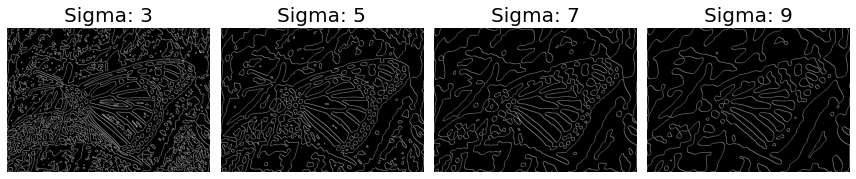

In [13]:
from skimage.filters import laplace, gaussian


def marr_hildreth(img, sigma):
    """Applies the Marr-Hildreth edge detection to the image.

    Args:
        img (numpy.array): The image
        sigma (float): The sigma value for the gaussian filter

    Returns:
        numpy.array: The edge detected in the image, as a bool array
    """

    im_smooth = gaussian(img, sigma=sigma)
    im_lap_gauss = np.sign(laplace(im_smooth))

    # {+,-}, {-,+} in x
    e1 = im_lap_gauss[:-1] * im_lap_gauss[1:] < 0
    # {+,-}, {-,+} in y
    e2 = im_lap_gauss[:, :-1] * im_lap_gauss[:, 1:] < 0

    # We can now combine the results
    return np.pad(e1, ((0, 1), (0, 0))) | np.pad(e2, ((0, 0), (0, 1)))

fig, ax = plt.subplots(1, 4, figsize=(12, 3))

sigmas = [3, 5, 7, 9]

for i, sigma in enumerate(sigmas):
    ax[i].imshow(marr_hildreth(img, sigma), cmap="gray")
    ax[i].set_title("Sigma: " + str(sigma), fontsize=20)
    ax[i].axis("off")

plt.tight_layout()

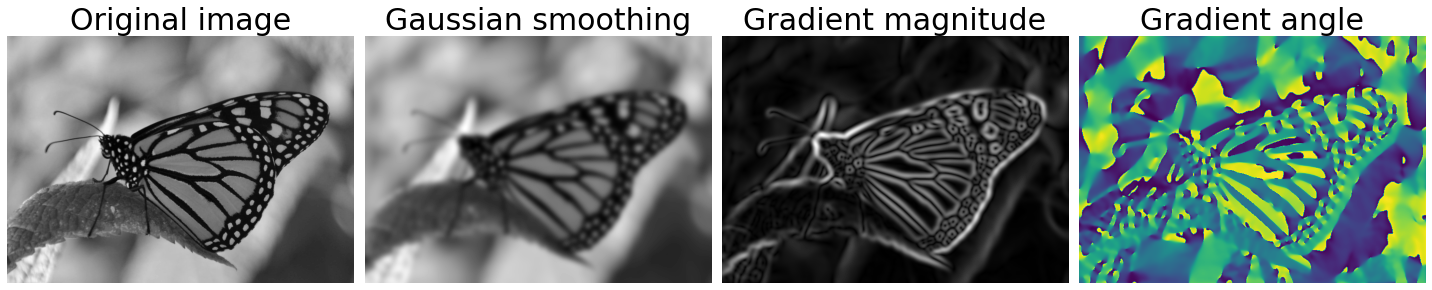

In [14]:
from skimage.feature import canny
from skimage.filters import gaussian

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

im_smooth = gaussian(img, sigma=5)
im_sob = sobel(im_smooth)
im_sobx = sobel(im_smooth, axis=0)
im_soby = sobel(im_smooth, axis=1)
grad_angle = np.arctan2(im_soby, im_sobx)


ax[0].imshow(img, cmap="gray")
ax[1].imshow(gaussian(img, sigma=5), cmap="gray")
ax[2].imshow(im_sob, cmap="gray")
ax[3].imshow(grad_angle, cmap="viridis")

titles = ['Original image', 'Gaussian smoothing', 'Gradient magnitude', 'Gradient angle']

for i, a in enumerate(ax):
    a.set_title(titles[i], fontsize=30)
    a.axis("off")

plt.tight_layout()

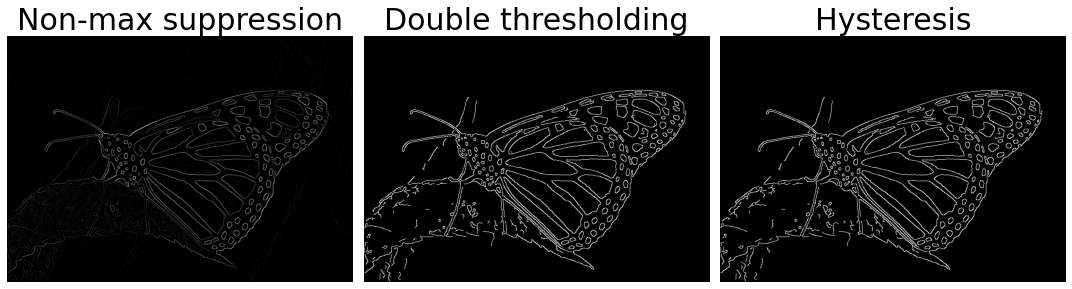

In [26]:
from canny_edge_detector import cannyEdgeDetector as cn

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

im_smooth = gaussian(img, sigma=5)
im_sob = sobel(im_smooth)

canny_monarch = cn([img])
res = canny_monarch.detect()

titles = ["Non-max suppression", "Double thresholding", "Hysteresis"]

for i, a in enumerate(ax):
    a.imshow(res[0][i], cmap="gray", vmin=0, vmax=255)
    a.axis("off")
    a.set_title(titles[i], fontsize=30)

plt.tight_layout()

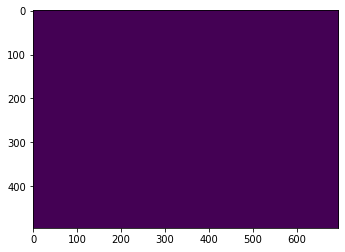

In [27]:
plt.imshow(res[0][2] - res[0][1])